# Marketing Analytics Exploratory/Statistical Analysis task

## Introduction

This notebook will accomplish the following task:

**Section 01: Exploratory Data Analysis**  
* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?

**Section 02: Statistical Analysis**  
* Does US fare significantly better than the Rest of the World in terms of total purchases?
* Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
* Is there a significant relationship between geographical regional and success of a campaign?

**Section 03: Data Visualization**  
Please plot and visualize the answers to the below questions.  

* Which marketing campaign is most successful?
* What does the average customer look like for this company?
* Which products are performing best?
* Which channels are underperforming?

## Dataset

Before beginning the analysis, we will load and view the dataset, and perform some initial cleaning.

* View the dataset info:

In [1]:
# load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load dataset
df = pd.read_csv('marketing_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [3]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [4]:
#Data Cleaning

# clean up column names that contain whitespace
df.rename(columns={' Income ': 'Income'}, inplace=True)

def str_formatting(amount):
    return float(str(amount).lstrip('$').replace(',', ''))

# transform Income column to a numerical
df['Income'] = df['Income'].apply(str_formatting)

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

In [5]:
df.reset_index()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,...,6,1,0,0,0,0,0,1,0,SP
1,1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,...,7,5,0,0,0,0,1,1,0,CA
2,2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,...,5,2,0,0,0,0,0,0,0,US
3,3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,...,2,7,0,0,0,0,0,0,0,AUS
4,4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,...,11,4,0,0,0,0,0,0,0,US
2236,2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,...,3,8,0,0,0,0,0,0,0,SP
2237,2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,...,5,8,0,0,0,0,0,0,0,SP
2238,2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,...,10,3,0,0,0,0,0,0,0,IND


In [6]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [7]:
num_vars = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth' ]

cat_vars = ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country' ]

## Section 01. Exploratory Data Analysis

### Missing values

In [8]:
# looking for null values
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [9]:
# The feature `Income` contains 24 null values
# Plot this feature to identify best strategy for imputation

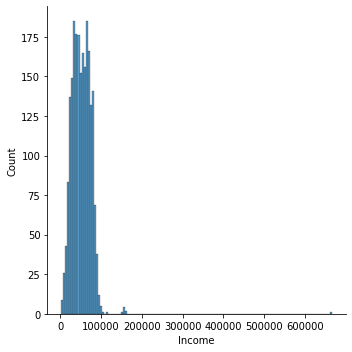

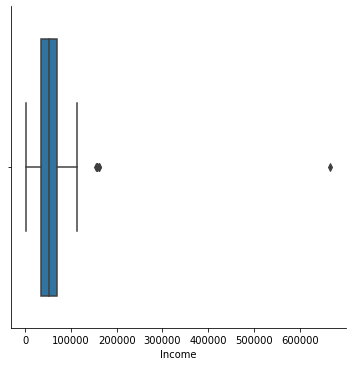

In [10]:
sns.displot(data=df, x='Income')
sns.catplot(data=df, x='Income', kind='box')

In [11]:
df['Income'].fillna(value=df['Income'].median(), inplace=True)

In [12]:
print(df['Income'].isnull().sum())
print(df['Income'].isna().sum())

0
0


### Univariate Distribution

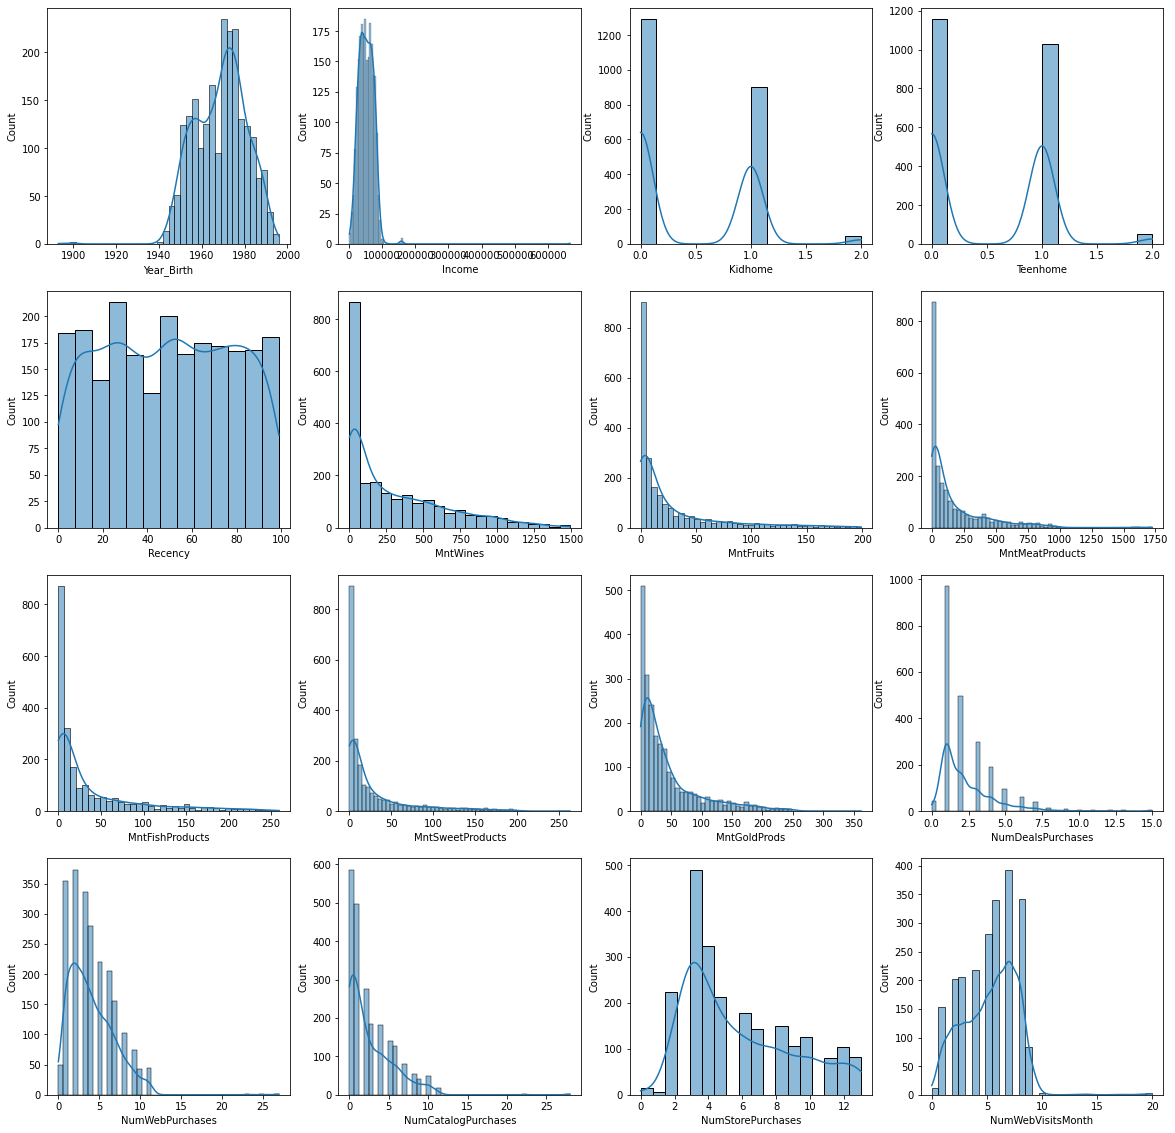

In [13]:
fig, ax = plt.subplots(4,4, figsize=(20, 20))

for i in range(4):
    for j in range(4):
        sns.histplot(ax=ax[i,j], data=df, x=num_vars[i*4+j], kde=True)

### Outlier Detection

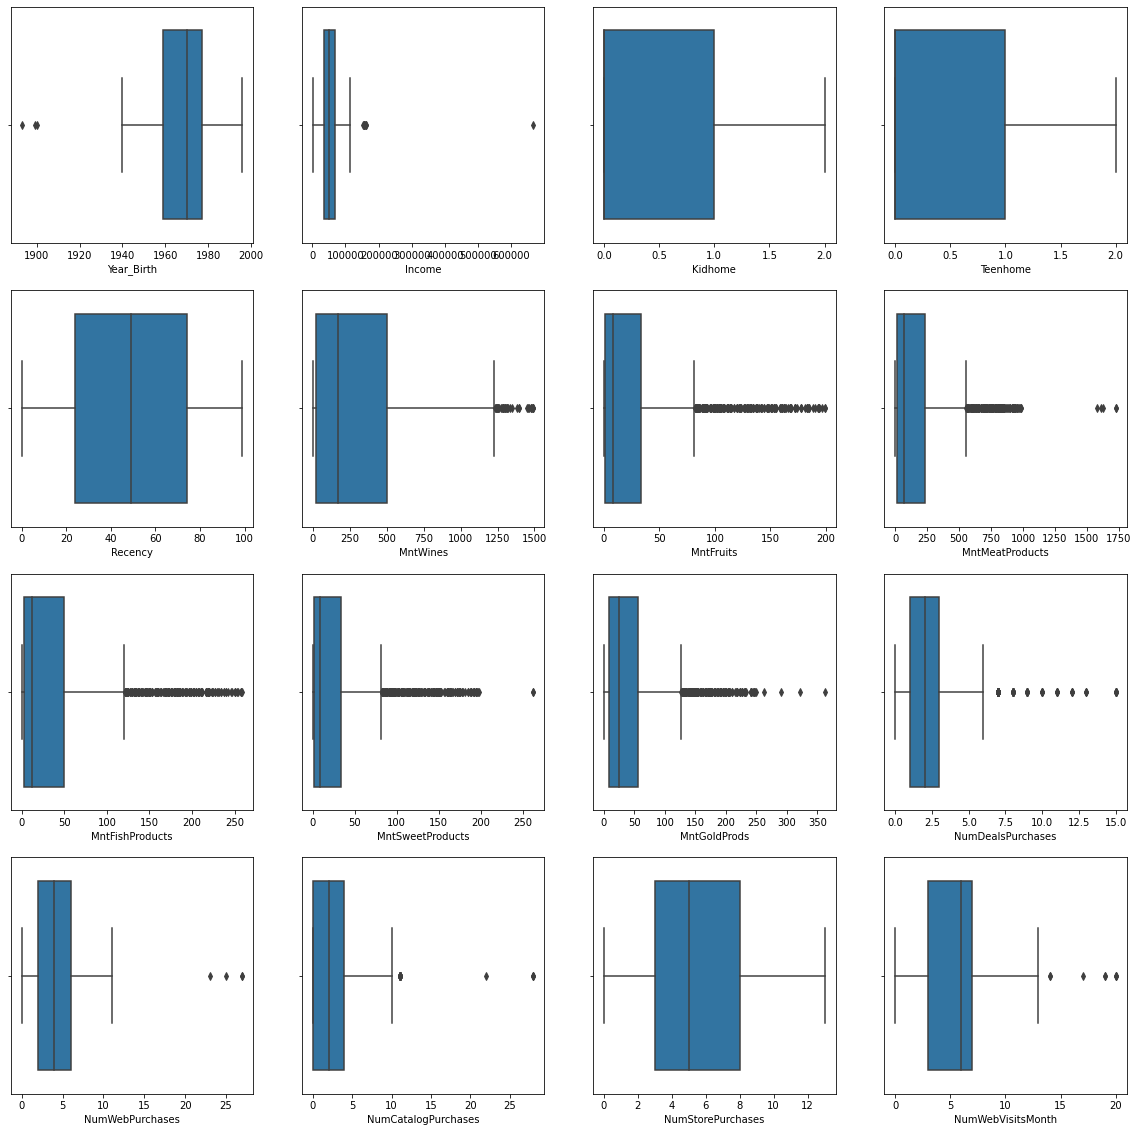

In [14]:
fig, ax = plt.subplots(4,4, figsize=(20, 20))

for i in range(4):
    for j in range(4):
        sns.boxplot(ax=ax[i,j], data=df, x=num_vars[i*4+j])

In [15]:
#dropping entries with Year_Birth <= 1900

idx = df['Year_Birth'] <= 1900
df.drop(index= df.index[idx], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

### Feature Engineering

In [17]:
#total number of children at home
df['child_count'] = df['Kidhome'] + df['Teenhome']

df['join_year'] = pd.DatetimeIndex(df['Dt_Customer']).year

df['amount_spent'] = df.loc[:, ['MntWines', 'MntFruits','MntMeatProducts',
                                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df['total_purchases'] = df.loc[:, ['NumDealsPurchases', 'NumWebPurchases',
                                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum(axis=1)

df['success_campaign'] = df.loc[:, ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                                     'AcceptedCmp1', 'AcceptedCmp2', 'Response']].sum(axis= 1)


df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,child_count,join_year,amount_spent,total_purchases,success_campaign
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,0,2014,1190,16,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,0,2014,577,23,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,1,2014,251,13,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,2,2014,11,11,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,1,2014,91,15,2


In [18]:
# merging '2n cycle' with 'Master' level educaion
df['Education'].replace('2n Cycle', 'Master', inplace=True)

### Do you notice any patterns or anomalies in the data? Can you plot them?

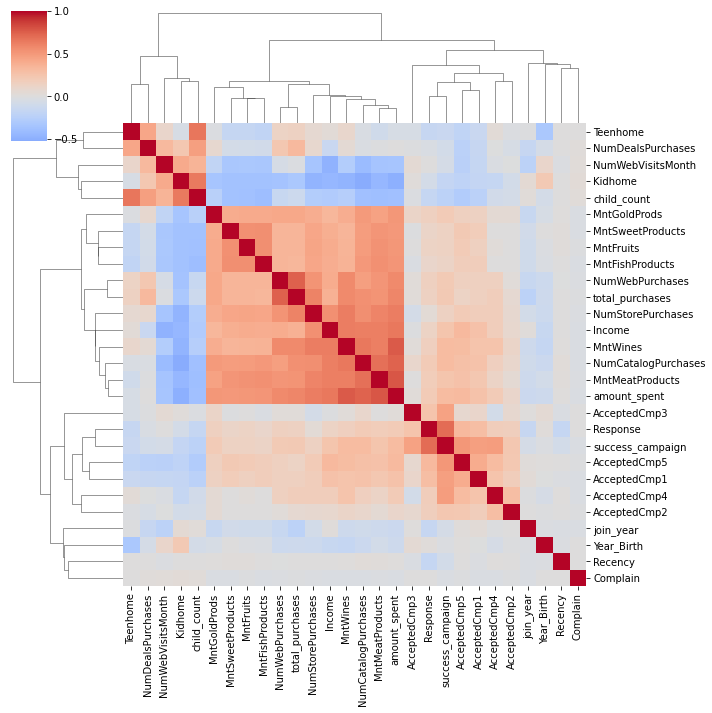

In [19]:
#selecting numerical and ordinal variables from correlation computations
corrdf = df.select_dtypes(include=np.number).drop(columns="ID")

# calculate correlation matrix
## using non-parametric test of correlation (kendall), since some features are binary
corr_matrix = corrdf.corr(method='kendall')

# plot clustered heatmap of correlations
sns.clustermap(corr_matrix, cmap='coolwarm', center=0)


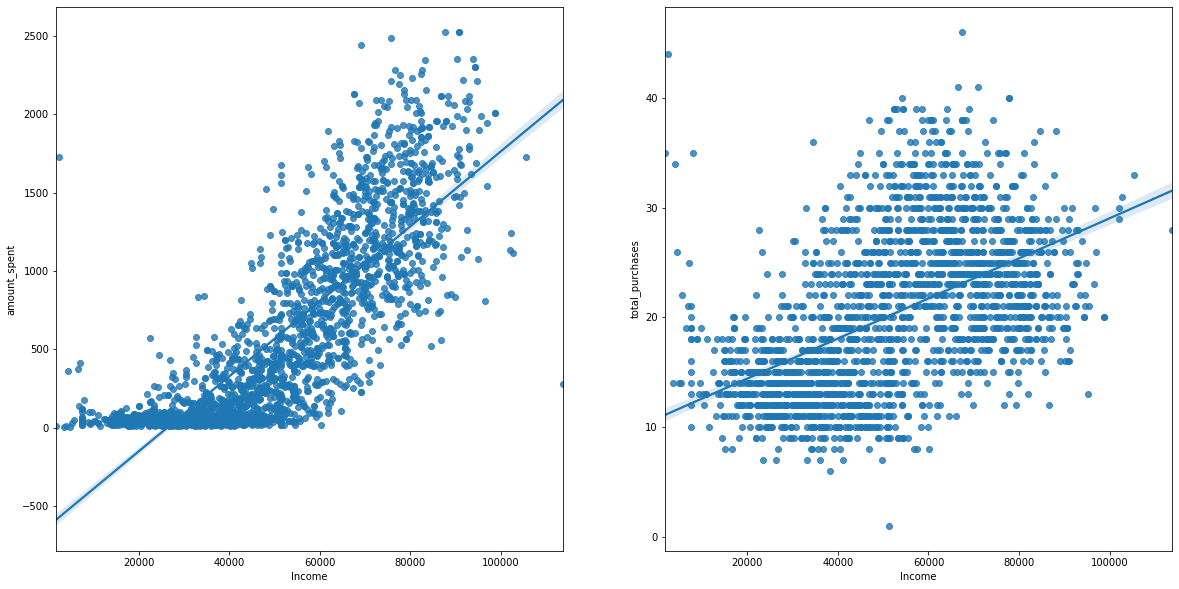

In [20]:
Income = df['Income'].describe()
up_limit = Income['75%'] + 1.5 * ( Income['75%'] - Income['25%'] )

fig, ax = plt.subplots(1,2, figsize=(20, 10));
sns.regplot(data=df[df['Income'] < up_limit], x='Income', y='amount_spent', ax=ax[0]);
sns.regplot(data=df[df['Income'] < up_limit], x='Income', y='total_purchases', ax=ax[1]);

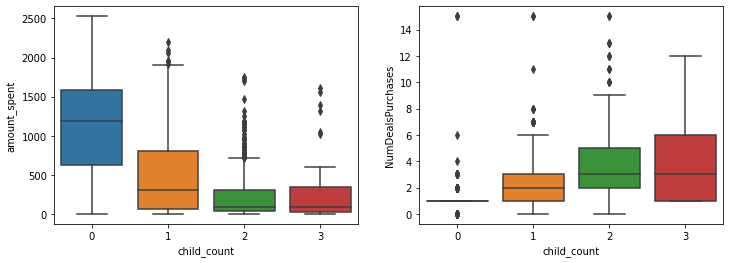

In [21]:
#assessing total amount spent and toal number of purchases from number of children at home 

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x='child_count', y='amount_spent', data=df, ax=ax[0]);
sns.boxplot(x='child_count', y='NumDealsPurchases', data=df, ax=ax[1]);


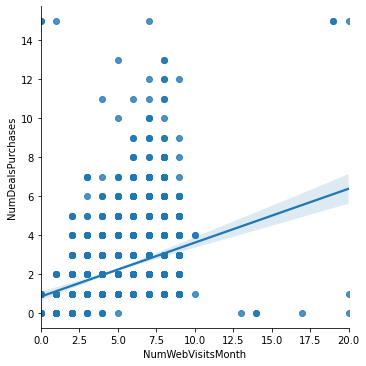

In [22]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df);

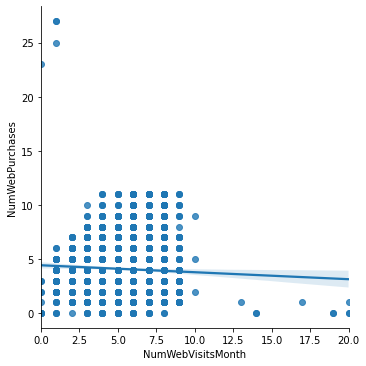

In [23]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df);

## Section 02: Statistical Analysis

- Does US fare significantly better than the Rest of the World in terms of total purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
- Is there a significant relationship between geographical regional and success of a campaign?

<AxesSubplot:xlabel='Country'>

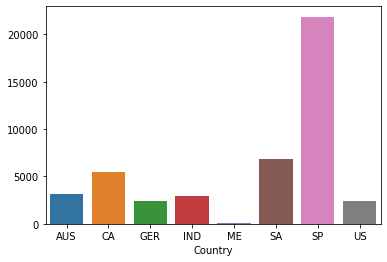

In [24]:
country_df= df.groupby('Country')['total_purchases'].sum()
sns.barplot(x=country_df.index, y=country_df.values)


<AxesSubplot:xlabel='Country'>

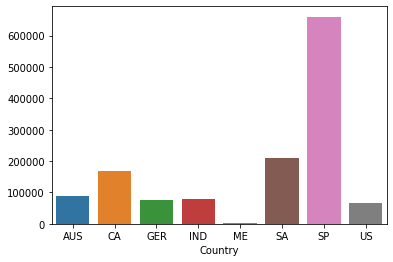

In [25]:
country_df= df.groupby('Country')['amount_spent'].sum()
sns.barplot(x=country_df.index, y=country_df.values)

- Spain has the most purchases and total amount spent. US performs relative worse than other countries.

### Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

In [26]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


- There is a positive relationship. Small value of p-value shows the relationship is significant.

### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? 


In [27]:
df['Married_PhD'] = (df['Marital_Status'] == 'Married') & (df['Education'] == 'PhD')

# independent t-test p-value
from scipy.stats import ttest_ind
pval = ttest_ind(df.loc[df['Married_PhD'], 'MntFishProducts'], df.loc[~df['Married_PhD'], 'MntFishProducts']).pvalue
print("t-test p-value: ", pval)

t-test p-value:  0.005297012242158541


- There is a significant positive relationship 

### Which Countries are most successful in terms of campaign?

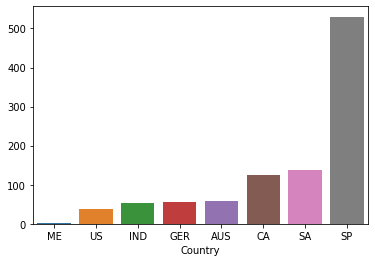

In [28]:
country_df= df.groupby('Country')['success_campaign'].sum().sort_values()
sns.barplot(x=country_df.index, y=country_df.values);

### Which marketing campaign is most successful?

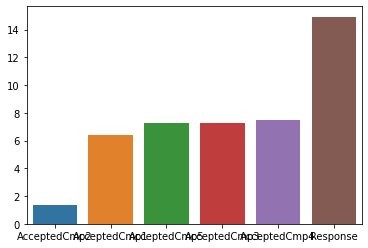

In [29]:
campaign_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response']
successrate = df[campaign_cols].sum()*100 / df.shape[0]
successrate.sort_values(inplace=True)

sns.barplot(x=successrate.index, y=successrate.values);

- Campaign of the last month(Response) is the most successful campaign in terms of success percentage.

### What does the average customer look like for this company?

In [30]:
demographic_cols = ['Year_Birth', 'join_year', 'Income', 'child_count', 'Recency']
# average customer
df[demographic_cols].mean()

Year_Birth      1968.901654
join_year       2013.027716
Income         52227.407689
child_count        0.950827
Recency           49.104604
dtype: float64

* Basic demographics: The average customer is...
    - Born in 1969
    - Became a customer in 2013
    - Has an income of roughly \$52,000 per year
    - Has 1 dependent
    - Made a purchase from our company in the last 49 days

### Which products are performing best?

In [31]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
prodperf = df[spend_cols].agg(['mean', sum]).T
prodperf

,mean,sum
MntWines,303.995530,680038.0
MntFruits,26.270451,58767.0
MntMeatProducts,166.916853,373393.0
MntFishProducts,37.523022,83939.0
MntSweetProducts,27.068842,60553.0
MntGoldProds,43.968708,98358.0


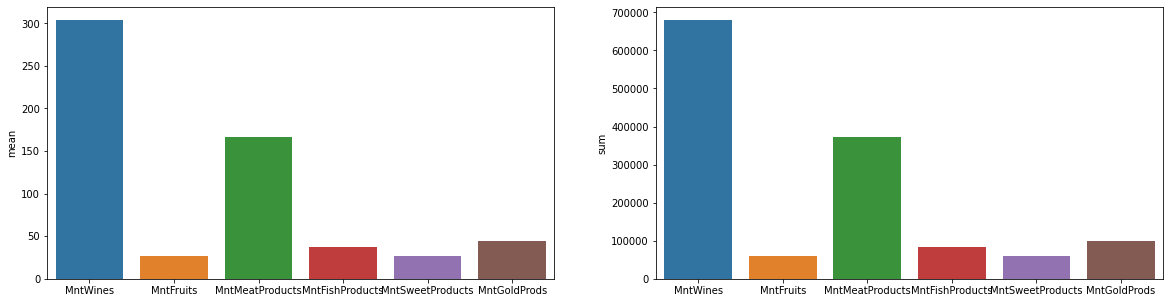

In [33]:
fig, ax = plt.subplots(1,2, figsize=(20,5 ))
sns.barplot(data= prodperf, x=prodperf.index, y='mean',ax=ax[0]);
sns.barplot(data= prodperf, x=prodperf.index, y='sum',ax=ax[1]);

* The average customer spent...
    - \$25-50 on Fruits, Sweets, Fish, or Gold products
    - Over \$160 on Meat products
    - Over \$300 on Wines
    - Over \$600 total
* Products performing best:
    - Wines
    - Followed by meats